# Practical 8: Feature Selection and Dimensionality Reduction  


Upon completion of this session you should be able to:
- understand how feature selection and dimensionality reduction methods such as PCA work.
- be able to apply these methods in Python to select feature and/or reduce dimensionality.

---
- Materials in this module include resources collected from various open-source online repositories.
- Jupyter source file can be downloaded from https://github.com/gaoshangdeakin/SIT384-Jupyter
- If you found any issue/bug for this document, please submit an issue at [https://github.com/gaoshangdeakin/SIT384/issues](https://github.com/gaoshangdeakin/SIT384/issues)


---



This practical session will demonstrate feature selection and dimensionality reduction methods, such as PCA.


## Background


### Part 1 Feature Selection

1.1 [Generating Random Data](#data3)

1.2 [Variance Feature Selection](#varfs)

1.3 [UniVariance Feature Selection](#uvarfs)

### Part 2 PCA and Dimensionality Reduction 

2.1 [Principal Component Analysis](#pca)

2.2 [Dimensionality Reduction with DictVectorizer](#dictvector)

2.3 [Other Demensionality Reducting Routines](#others)


## Tasks

## Summary

---

---
## <span style="color:#0b486b">1. Feature Selection</span>


In this lab session, you will learn how to use <b>Dimensionality Reduction</b> in the form of <b>Feature Selection</b> and <b>Feature Extraction</b>.

We will first be looking at Feature Selection with <b>VarianceThreshold</b>. VarianceThreshold is a useful tool to removing features with a threshold variance. It is a simple and basic Feature Selection.

---
<a id = "data3"></a>

### <span style="color:#0b486b">1.1 Data Set</span>

Now we will be working with the <b>skulls dataset</b>. Using the <b>my_data</b> variable and <b>removeColumns</b> function, create a variable called <b>X</b> which has the <b>row column dropped</b>.

The data file "skills.csv" and its description skulls_Egyptian_Skulls_DESCRIPTION.txt can be retrieved from github site (link as below) or the corresponding prac folder on clouddeakin. If the latter, you do NOT have to install wget or download it from github. 

In [30]:
#no need to install wget if you've downloaded the data file from clouddeakin
!pip install wget

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [31]:
#no need to use wget.download() if you've downloaded the data file from clouddeakin
import wget

link_to_data = 'https://raw.githubusercontent.com/gaoshangdeakin/SIT384/master/skulls.csv'
#description file is available at: 
#https://raw.githubusercontent.com/gaoshangdeakin/SIT384/master/skulls_Egyptian_Skulls_DESCRIPTION.txt

DataSet = wget.download(link_to_data)

In [32]:
import pandas

my_data = pandas.read_csv("skulls.csv", delimiter=",")

In [33]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [34]:
X = removeColumns(my_data, 0, 1)

Now use the <b>target function</b> to obtain the <b>Response Vector</b> of <b>my_data</b> and store it as <b>y</b>

In [35]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [36]:
y = target(my_data, 1)

---
<a id = "varfs"></a>

### <span style="color:#0b486b">1.2 Variance Feature Selection</span>

First import <b>VarianceThreshold</b> from sklearn.feature_selection

In [37]:
from sklearn.feature_selection import VarianceThreshold

Now let's instantiate <b>VarianceThreshold</b> as a variable called <b>sel</b>

In [38]:
sel = VarianceThreshold()

Now <b>VarianceThreshold</b> removes all <b>zero-variance features</b> by default. These features are any <b>constant value</b> features. Given the dataset below, let's try to run <b>fit_transform</b> function from <b>sel</b> on it.

In [39]:
sel.fit_transform(X)

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54],
       [138, 137,  89,  56],
       [139, 130, 108,  48],
       [125, 136,  93,  48],
       [131, 134, 102,  51],
       [134, 134,  99,  51],
       [129, 138,  95,  50],
       [134, 121,  95,  53],
       [126, 129, 109,  51],
       [132, 136, 100,  50],
       [141, 140, 100,  51],
       [131, 134,  97,  54],
       [135, 137, 103,  50],
       [132, 133,  93,  53],
       [139, 136,  96,  50],
       [132, 131, 101,  49],
       [126, 133, 102,  51],
       [135, 135, 103,  47],
       [134, 124,  93,  53],
       [128, 134, 103,  50],
       [130, 130, 104,  49],
       [138, 135, 100,  55],
       [128, 132,  93,  53],
       [127, 129, 106,  48],
       [131, 136, 114,  54],
       [124, 138, 101,  46],
       [124, 138, 101,  48],
       [133, 134,  97,  48],
       [138, 134,  98,  45],
       [148, 129, 104,  51],
       [126, 1

Now you should have only <b>two features</b> left. The first and second features were removed since they had a <b>variance</b> of 0. You probably won't encounter constant value features very often, therefore you will want to keep a certain <b>threshold</b>. 


We can change the threshold by adding <b>threshold='threshold value'</b> inside the brackets during the instantiation of <b>VarianceThreshold</b>. Where <b>'threshold value'</b> is equal to <br>

$$ Var(X) = p(1-p) $$

Where <b>'p'</b> is your threshold % in <b>decimal format</b>.

So, for example if I wanted a threshold of <b>60%</b>, I would equate <b>threshold=0.6 * (1 - 0.6)</b>

Now let's instantiate another <b>VarianceThreshold</b> but with a threshold of <b>90%</b>. We'll called it <b>sel90</b>.

In [40]:
sel90 = VarianceThreshold(threshold=(0.9 * (1 - 0.9)))

In [41]:
sel90.fit_transform(X)

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54],
       [138, 137,  89,  56],
       [139, 130, 108,  48],
       [125, 136,  93,  48],
       [131, 134, 102,  51],
       [134, 134,  99,  51],
       [129, 138,  95,  50],
       [134, 121,  95,  53],
       [126, 129, 109,  51],
       [132, 136, 100,  50],
       [141, 140, 100,  51],
       [131, 134,  97,  54],
       [135, 137, 103,  50],
       [132, 133,  93,  53],
       [139, 136,  96,  50],
       [132, 131, 101,  49],
       [126, 133, 102,  51],
       [135, 135, 103,  47],
       [134, 124,  93,  53],
       [128, 134, 103,  50],
       [130, 130, 104,  49],
       [138, 135, 100,  55],
       [128, 132,  93,  53],
       [127, 129, 106,  48],
       [131, 136, 114,  54],
       [124, 138, 101,  46],
       [124, 138, 101,  48],
       [133, 134,  97,  48],
       [138, 134,  98,  45],
       [148, 129, 104,  51],
       [126, 1

You should only have <b>one feature</b> left. The last column feature was the only feature to have a variance of <b>at least 90%</b>.

---
<a id = "uvarfs"></a>

### <span style="color:#0b486b">1.3 Univariance Feature Selection</span>

Now let's look at <b>Univariance Feature Selection</b>.

We will need to import <b>SelectKBest</b> from <b>sklearn.feature_selection</b>, <b>chi2</b> from <b>sklearn.feature_selection</b>, <b>numpy</b> as <b>np</b>, and <b>pandas</b>.

How <b>Univariance</b> works is that it selects <b>features</b> based on <b>univariance statistical tests</b>. <b>chi2</b> is used as a <b>univariance scoring function</b> which returns <b>p</b> values. We specified <b>k=3</b> for the <b>3 best features</b> to be chosen. Now we will move onto <b>Feature Extraction!</b>

In [42]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import numpy as np 
import pandas

Now take a look at <b>X's shape</b> before the feature selection

In [43]:
X.shape

(150, 4)

Now we will use the <b>fit_transform</b> function with parameters <b>X</b>, <b>y</b> of <b>SelectKBest</b> with parameters <b>chi2</b>, <b>k=3</b>. This will be stored as <b>X_new</b>.
<br><br>
<b>Note</b>: There might be a VisibleDeprecationWarning, you can ignore it.

In [44]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)

Now let's check out the shape of <b>X_new</b>, it should have <b>one less</b> feature than before!

In [45]:
X_new.shape

(150, 3)

---
## <span style="color:#0b486b">2. Dimensionality Reduction and PCA</span>

We will first be looking at Principal Component Analysis <b>PCA</b>, which is an extremely useful linear dimensionality reduction technique.

---
<a id = "pca"></a>

### <span style="color:#0b486b">2.1 Principal Component Analysis</span>

We'll start with our standard set of initial imports:



In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

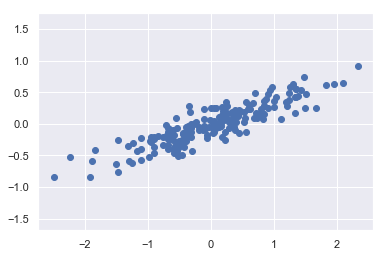

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

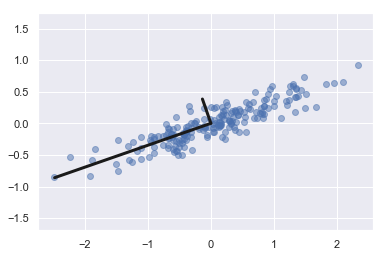

In [5]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [6]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

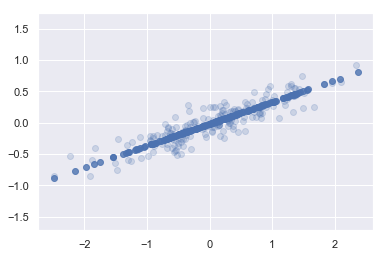

In [7]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the digits data we looked at before:

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [9]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


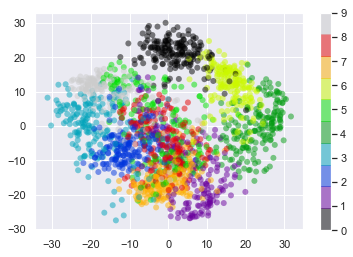

In [10]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### What do the Components Mean?

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.
The input data is represented as a vector: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

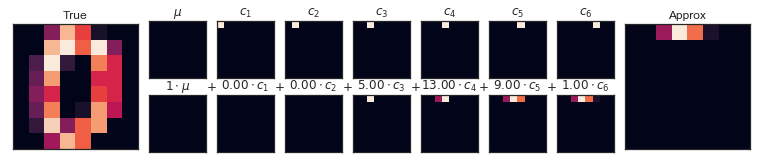

In [18]:
#download the fig_code zipped file (from week 6 or 8 folder on clouddeakin) and unzip the folder in the same folder as your .py file
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [19]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input! (To view the output, load the .ipynb in Jupyter)

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

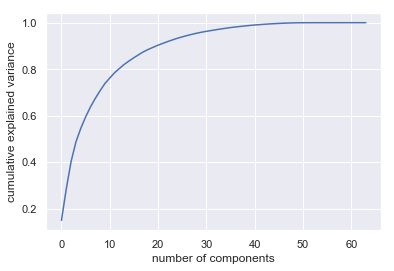

In [13]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

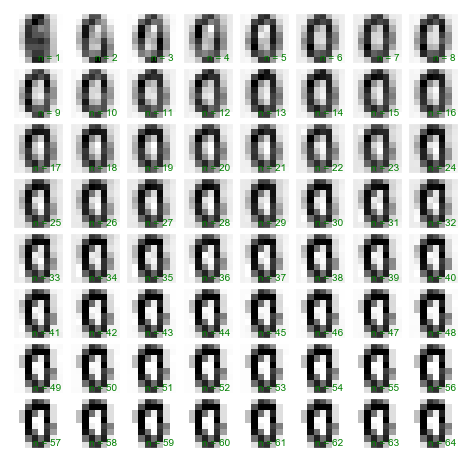

In [12]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once: (To view the output, load the .ipynb in Jupyter)

In [17]:
from ipywidgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 32, 64], nside=[1, 8]);

interactive(children=(Dropdown(description='n_components', options=(1, 32, 64), value=1), Output()), _dom_clas…

<a id = "dictvector"></a>

### <span style="color:#0b486b">2.2 Dimensionality Reduction with DictVectorizer</span> 

Now we will be working with the <b>skulls dataset</b>. Using the <b>my_data</b> variable and <b>removeColumns</b> function, create a variable called <b>X</b> which has the <b>row column dropped</b>.

<b>DictVectorizer</b> is a very simple <b>Feature Extraction</b> class as it can be used to <b>convert feature arrays</b> in a <b>dict</b> to <b>NumPy/SciPy</b> representations.

First we will need to import <b>DictVectorizer</b> from <b>sklearn.feature_extraction</b>

In [46]:
from sklearn.feature_extraction import DictVectorizer

We will use the following <b>dictionary</b> to be <b>converted</b>.

In [47]:
dataset = [
     {'Day': 'Monday', 'Temperature': 18},
     {'Day': 'Tuesday', 'Temperature': 13},
     {'Day': 'Wednesday', 'Temperature': 7},
 ]

Now create an <b>instance</b> of <b>DictVectorizer</b> called <b>vec</b>

In [48]:
vec = DictVectorizer()

Now we will use the <b>fit_transform</b> function of <b>vec</b> with the parameter <b>dataset</b> and use the <b>.toarray()</b> on the final product

In [49]:
vec.fit_transform(dataset).toarray()

array([[  1.,   0.,   0.,  18.],
       [  0.,   1.,   0.,  13.],
       [  0.,   0.,   1.,   7.]])

Now we can see that our <b>dataset</b> has been <b>converted</b> into an <b>array format</b> but pertaining its <b>data</b>. We can further review the <b>data</b> with the <b>get_feature_names</b> function of <b>vec</b>.

In [50]:
vec.get_feature_names()

['Day=Monday', 'Day=Tuesday', 'Day=Wednesday', 'Temperature']

Now we will use <b>PCA</b> to represent the <b>data</b> we used in feature selection(<b>X_new</b>) and project it's dimensions.  

First we must import <b>matplotlib.pyplot</b> as <b>plt</b>, <b>Axes3D</b> from <b>mpl_toolkits.mplot3d</b>, and <b>decomposition</b> from <b>sklearn</b>. <i>(And numpy as np if you haven't already.)</i> Include the <b>%matplotlib inline</b> to have the plot show up in your notebook.

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

Now we will just create instances of <b>plt.figure</b> as <b>fig</b> and <b>Axes3D</b> as <b>ax</b> with the following dimensions. In this case we specificed dimensions where <b>elev=0</b> and <b>azim=0</b> to see the graph from where the <b>z plane = 0</b>. This will be useful to <b>visualize</b> the <b>difference</b> later on.

<i> Note: You can change the elev and azim later on to see the graph in different ways. But it is suggested to keep it as is for now.</i>

We will plot <b>X_new</b> against <b>y</b> with the <b>scatter</b> function of <b>ax</b>. The <b>scatter</b> function will include all of <b>X_new's column data</b> (each as a seperate parameter), <b>c=y</b>, and <b>cmap=plt.cm.spectral</b> as below.

<b>Note</b>: You can ignore the FutureWarning.

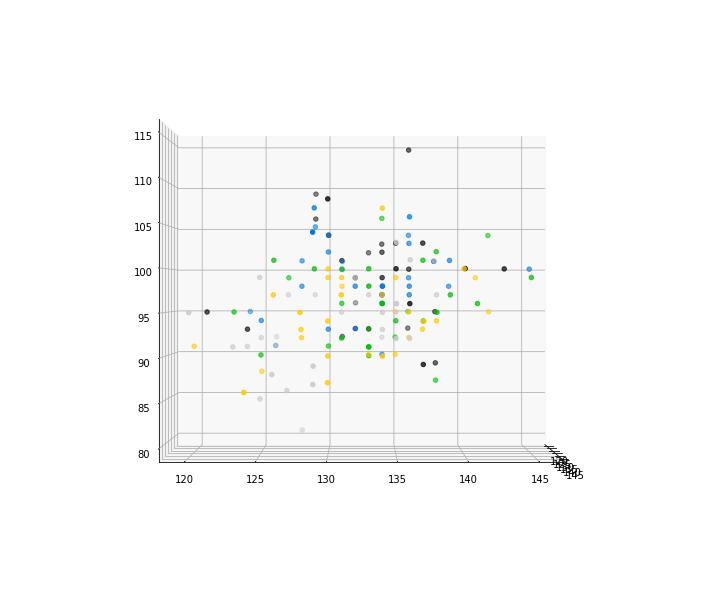

In [52]:
fig = plt.figure(1, figsize=(10, 8))
cmap = plt.cm.get_cmap("Spectral")
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=cmap)

Now you know what a <b>3D representation</b> of that data looks like from a <b>z = 0 plane perspective</b>, we will create an instance of <b>decomposition.PCA</b> called <b>pca</b> with parameters of <b>n_components=2</b>.

In [53]:
pca = decomposition.PCA(n_components=2)

In [54]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Use the <b>transform</b> function of <b>pca</b> with parameter <b>X_new</b> and equate it to a new variable called <b>PCA_X</b>. This will be the <b>projection</b> resulting in the change of <b>3 features</b> to <b>2</b>.

In [55]:
PCA_X = pca.transform(X_new)

Now plot <b>PCA_X</b> with <b>y</b> using the <b>scatter</b> function of <b>ax</b> as we did before. All the <b>parameters</b> will be the <b>same</b> except you are using <b>PCA_X</b> and the <b>highest</b> index column you are going to is <b>PCA_X[:, 1]</b>. Make sure you include the <b>fig</b> and <b>ax</b> declaration to make the graph show up!

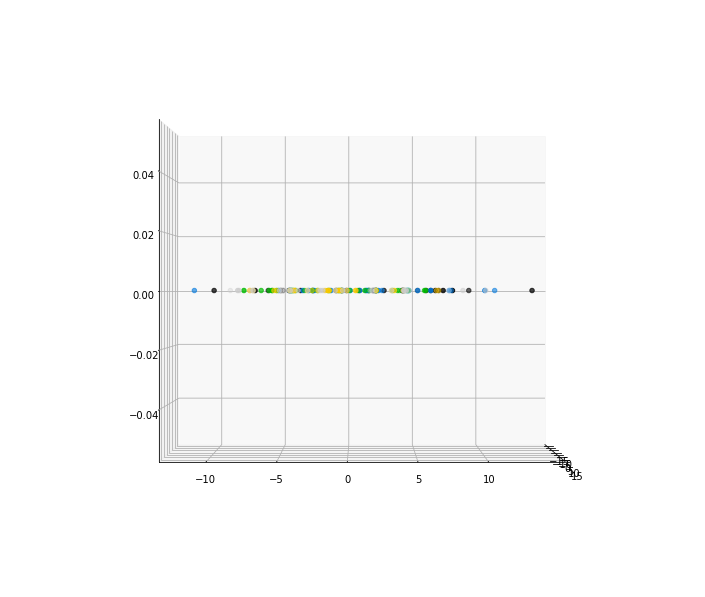

In [56]:
fig = plt.figure(2, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(PCA_X[:, 0], PCA_X[:, 1], c=y, cmap=cmap)

Now as you can see, given the <b>same view</b>, there are <b>no datapoints</b> except on the <b>z = 0 plane</b>. Rather the <b>datapoints</b> are on the <b>other axes</b> confirming a <b>projection</b> from <b>3 features</b> to <b>2</b>. You can even look at the <b>shape</b> of <b>PCA_X</b> to show <b>2 features</b>.

In [57]:
PCA_X.shape

(150, 2)

You may wish to <b>change</b> the values of <b>elev</b> and <b>azim</b> if you would like to view the graph in <b>different perspectives</b>. <b>Elev</b> controls the <b>elevation</b> of the <b>z plane</b> and <b>azim</b> controls the <b>azimuth angle</b> in the <b>x,y plane</b>. E.g. try elev=10, azim=10.

<a id = "others"></a>

### <span style="color:#0b486b">2.3 Other Dimensionality Reducting Routines</span> 

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are
Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website](http://sklearn.org).

# <span style="color:#0b486b">Tasks</span>

Try the provided examples and get yourself familiar with sample code before attempting portolio tasks.

Please show your attempt to your tutor before you leave the lab, or email your files to your coordinator if you are an off-campus student.


# <span style="color:#0b486b">Summary</span>

In this session we have covered: 
 - feature selection and dimensionality reduction methods.
 - how to apply the methods to select feature and reduce dimensionality in Python.

# <span style="color:#0b486b">Acknowledgement</span>

The PCA part was put together by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015. Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/).